<a href="https://colab.research.google.com/github/MarcosMorales2011/DS-Assignment-Submission-Practice-Repository/blob/master/Guatemala_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guatemala Data Analysis Notebook

This notebook will cover the process of data collection / cleaning / analyzing and visualization for my Unit 1 Build Week.

Research question: What insights can be gained about Guatemala's food crisis based on it's food security indicators?

In [1]:
# Import nescesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

In [2]:
# Load url and make a dataframe from it (different encoding due to dataframe):
url = 'https://data.nal.usda.gov/system/files/gfa25.csv'

df = pd.read_csv(url, encoding = "ISO-8859-1")

With the dataframe loaded, we have to begin the data cleaning process. We'll do this via exploratory data analysis

In [3]:
# Take a look at the top 5 rows of the dataframe to get insight from it
df.head()

,Country,Commodity,Item,Unit,Year,Amount
0,Algeria,Total Grains/Cereals,Area Harvested,1000 Ha,1980,3181.38000
1,Algeria,Total Grains/Cereals,Yield,MT / Ha,1980,0.76026
2,Algeria,Total Grains/Cereals,Production Quantity,1000 MT,1980,2418.67440
3,Algeria,Economic Data,"Gross Domestic Product, constant prices",Percent change,1980,-5.40000
4,Algeria,Economic Data,GDP (constant 2005 US$),Million,1980,50817.86555


Our research is of course focused on the food security indicators in Guatemala. However, since the dataset does provide information for many countries, it woul be useful to draw comparisons between Guatemala and other countries. In this case, we'll be taking a look at the more developed Peru and Haiti, that was heavily affected in it's development by the 2010 earthquake.

In [4]:
# We want to gain insight on Guatemala's food indicators
# However, we could also compare them to another country's indicators

# see all the unique values in the dataframe
# Using this method since value_counts hides some values in google colab
column_values = df["Country"].values.ravel()
unique_values =  pd.unique(column_values)
unique_values

array(['Algeria', 'Egypt', 'Morocco', 'Tunisia', 'Cameroon', 'CAR',
       'DRCongo', 'Burundi', 'Eritrea', 'Ethiopia', 'Kenya', 'Rwanda',
       'Somalia', 'Sudan', 'Tanzania', 'Uganda', 'Angola', 'Lesotho',
       'Madagascar', 'Malawi', 'Mozambique', 'Swaziland', 'Zambia',
       'Zimbabwe', 'Benin', 'Burkina Faso', 'Cape Verde', 'Chad',
       "Côte d'Ivoire", 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Senegal',
       'Sierra Leone', 'Togo', 'Namibia', 'Congo', 'Afghanistan',
       'Bangladesh', 'India', 'Indonesia', 'North Korea', 'Nepal',
       'Pakistan', 'Philippines', 'Sri Lanka', 'Vietnam', 'Cambodia',
       'Laos', 'Mongolia', 'Yemen', 'Armenia', 'Azerbaijan', 'Georgia',
       'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'Uzbekistan',
       'Moldova', 'Bolivia', 'Colombia', 'DomRep', 'Ecuador',
       'El Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica',
       'Nicaragua', 'Peru'], dtype=object)

In [5]:
# Via a conditional, make a new dataframe for just Guatemala
condition = df['Country'] == 'Guatemala'

gua = df[condition]

In [6]:
# Take a look at the top rows of the new dataframe

gua.head()

,Country,Commodity,Item,Unit,Year,Amount
83198,Guatemala,Total Grains/Cereals,Area Harvested,1000 Ha,1980,746.640000
83199,Guatemala,Total Grains/Cereals,Yield,MT / Ha,1980,1.429902
83200,Guatemala,Total Grains/Cereals,Production Quantity,1000 MT,1980,1067.621780
83201,Guatemala,Economic Data,"Gross Domestic Product, constant prices",Percent change,1980,3.700000
83202,Guatemala,Economic Data,GDP (constant 2005 US$),Million,1980,14356.892880


In [7]:
# Use a different condition to make a new dataframe for Peru
condition = df['Country'] == 'Peru'

per = df[condition]

In [8]:
# Use a different condition to make an ew dataframe for Haiti
condition = df['Country'] == 'Haiti'

hai = df[condition]

In [9]:
# Take a look at the Haiti dataframe
hai.head()

,Country,Commodity,Item,Unit,Year,Amount
84444,Haiti,Total Grains/Cereals,Area Harvested,1000 Ha,1980,413.000000
84445,Haiti,Total Grains/Cereals,Yield,MT / Ha,1980,0.919628
84446,Haiti,Total Grains/Cereals,Production Quantity,1000 MT,1980,379.806570
84447,Haiti,Economic Data,"Gross Domestic Product, constant prices",Percent change,1980,7.345000
84448,Haiti,Total Grains/Cereals,Import Quantity,1000 MT,1980,197.235000


In [10]:
# Take a look at the Peru dataframe
per.head()

,Country,Commodity,Item,Unit,Year,Amount
89242,Peru,Total Grains/Cereals,Area Harvested,1000 Ha,1980,639.839000
89243,Peru,Total Grains/Cereals,Yield,MT / Ha,1980,1.588542
89244,Peru,Total Grains/Cereals,Production Quantity,1000 MT,1980,1016.411410
89245,Peru,Economic Data,"Gross Domestic Product, constant prices",Percent change,1980,7.661000
89246,Peru,Economic Data,GDP (constant 2005 US$),Million,1980,47428.144540


In [11]:
# Drop the useless categorical column, use pivot table to draw features
# From rows to columns 
gua = gua.drop('Commodity', axis=1)
gua = gua.pivot_table(index='Year', columns='Item', values='Amount')

In [12]:
# Take a look at the cleaned Guatemala dataframe
# Note: NaN values are because no data could be recorded for that feature in that given year
gua.head()

Item,Area Harvested,Cereal Food Aid,Export Quantity,Exports of goods and services (constant 2005 US$),FAO Conversion Rate for Root Crops from MT to Grain Equiv. MT,Feed + Seed,Food Availability,Food Availability per capita,Food Supply,GDP (constant 2005 US$),"Gross Domestic Product, constant prices",Import Quantity,Import Unit Value,Import Value,Imports of goods and services (constant 2005 US$),Non-Cereal Food Aid,Production Quantity,Stock Variation,Total,Total Population - Both Sexes,WB GDP (constant 2005 US$) / FAO population,Waste + Processed + OtherUtilization,Waste + Processed + OtherUtilization - Stock Variation,Yield
Year,,,,,,,,,,,,,,,,,,,,,,,,
1980,506.960000,NaN,13.367267,4806.282958,0.213211,131.528886,488.298969,92.533441,600.424699,14356.89288,3.700,103.975213,202.687263,41.333,4847.914496,NaN,717.526729,17.509301,NaN,7.036,2040.490745,68.884,-6.292288,1.029020
1981,523.233333,NaN,2.850962,4113.870691,0.219343,111.331861,575.753467,106.443606,656.800916,14449.76169,0.644,112.831536,194.944379,43.110,4649.031331,NaN,782.748595,25.356514,NaN,7.212,2003.572058,84.668,0.933304,1.162645
1982,508.626667,NaN,12.625901,3766.188673,0.197311,109.716267,544.140929,98.136242,646.729037,13939.67224,-3.542,62.348058,206.279068,23.108,3673.295140,NaN,846.852030,4.154311,NaN,7.393,1885.523095,78.777,0.976494,1.197900
1983,451.345333,NaN,3.387226,3356.499391,0.212551,108.377867,527.229164,92.752635,657.445354,13581.13111,-2.528,88.648495,200.554384,34.729,2943.690602,NaN,827.471847,-9.726949,NaN,7.579,1791.942356,128.422,0.961155,1.407975
1984,484.706667,NaN,2.216803,3247.987095,0.212912,107.222769,489.490977,84.039999,635.511329,13648.58830,0.510,101.888585,196.554520,38.792,3153.561787,NaN,765.592265,-9.514500,NaN,7.766,1757.479822,130.523,1.024320,1.269235


In [13]:
# Same data cleaning process for Peru dataframe
per = per.drop('Commodity', axis=1)
per = per.pivot_table(index='Year', columns='Item', values='Amount')

In [14]:
# Same data cleaning process for Haiti dataframe
hai = hai.drop('Commodity', axis=1)
hai = hai.pivot_table(index='Year', columns='Item', values='Amount')

In [15]:
# See he peru dataframe, see what's a NaN value based on the head (1980-1984)
per.head()

Item,Area Harvested,Cereal Food Aid,Export Quantity,Exports of goods and services (constant 2005 US$),FAO Conversion Rate for Root Crops from MT to Grain Equiv. MT,Feed + Seed,Food Availability,Food Availability per capita,Food Supply,GDP (constant 2005 US$),"Gross Domestic Product, constant prices",Import Quantity,Import Unit Value,Import Value,Imports of goods and services (constant 2005 US$),Non-Cereal Food Aid,Production Quantity,Stock Variation,Total,Total Population - Both Sexes,WB GDP (constant 2005 US$) / FAO population,Waste + Processed + OtherUtilization,Waste + Processed + OtherUtilization - Stock Variation,Yield
Year,,,,,,,,,,,,,,,,,,,,,,,,
1980,634.134667,NaN,1.457035,5530.236698,0.357967,440.182557,1158.593672,89.361460,1612.634803,47428.14454,7.661,808.196616,222.852669,360.043,6291.079391,NaN,1231.319253,31.7860,NaN,17.287,2743.572890,195.763,182.155862,2.128032
1981,735.399333,NaN,0.820540,5577.285938,0.359982,455.833347,1259.561807,94.775155,1780.594743,50833.76342,5.461,763.493394,244.630459,373.492,7469.317134,NaN,1575.135390,-60.8540,NaN,17.720,2868.722541,200.002,212.927563,2.362585
1982,758.626667,NaN,0.833174,6170.583308,0.349470,506.091695,1331.270740,97.786891,1811.359669,50528.76084,-0.324,785.390526,182.192723,286.161,7564.503931,NaN,1589.560277,34.8005,NaN,18.152,2783.647027,212.079,199.470700,2.288107
1983,706.176000,NaN,0.742610,5504.216839,0.357539,483.951142,1273.156506,91.339360,1742.887689,44566.36706,-9.329,821.347977,199.228773,326.112,5674.784201,NaN,1423.221103,48.6610,NaN,18.585,2397.975091,195.365,170.388799,2.250252
1984,765.379333,NaN,0.215555,5891.572054,0.370535,424.094480,1218.163948,85.390810,1831.274615,46883.81815,3.801,617.595602,190.511587,235.278,4964.833212,NaN,1777.510781,-142.6695,NaN,19.021,2464.845074,195.928,187.970703,2.559519


In [16]:
# See the food availabilty per capita for every given year
gua['Food Availability per capita']

Year
1980     92.533441
1981    106.443606
1982     98.136242
1983     92.752635
1984     84.039999
1985     91.975679
1986    101.430127
1987    101.625385
1988    103.280035
1989     93.974952
1990     95.551641
1991     94.650424
1992     93.240334
1993     97.655238
1994     97.687491
1995     99.393179
1996     95.679472
1997     89.550274
1998     90.256598
1999     93.518979
2000     81.902792
2001     82.556718
2002     83.347302
2003     84.296858
2004     84.688206
2005     87.110761
2006     90.040826
2007     89.139683
2008     86.544108
2009     85.223976
2010     85.721181
2011     86.768346
2012     85.326952
2013     85.524615
Name: Food Availability per capita, dtype: float64

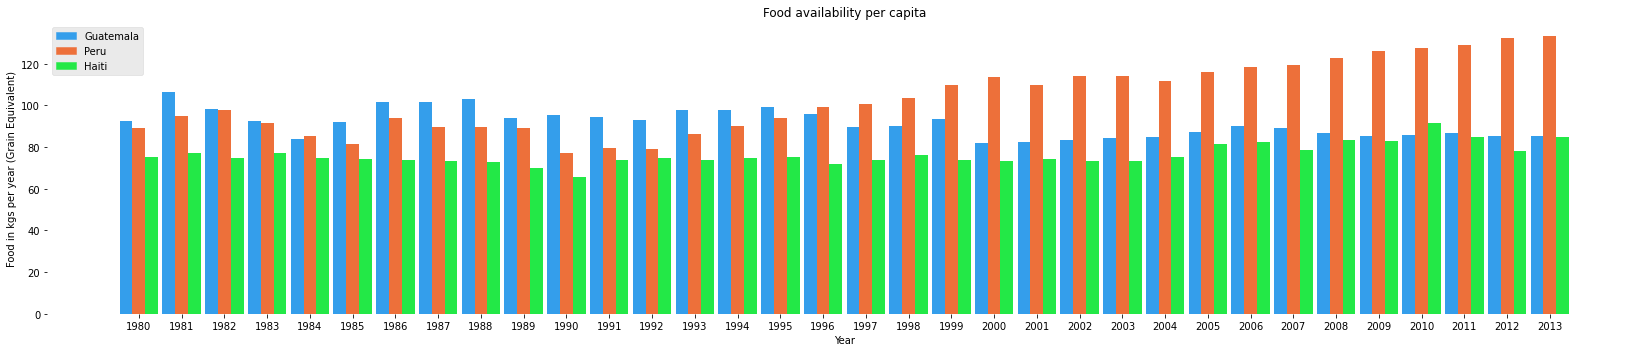

In [17]:
## Make the first visualization

# Labels are used for the x-value, in this case the years
labels = np.arange(1980, 2014)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Make the graph based on a size
fig, ax = plt.subplots(figsize=(23,5))

# Make the three bar charts for Guatemala, Peru and Haiti
ax.bar(x = x-0.3, height=gua['Food Availability per capita'],color='#349eeb', width=0.3)
ax.bar(x = x, height=per['Food Availability per capita'], color= '#ED703A', width=0.3)
ax.bar(x = x+0.3, height=hai['Food Availability per capita'], color= '#23e847', width=0.3)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Food in kgs per year (Grain Equivalent)')
ax.set_xlabel('Year')
ax.set_title('Food availability per capita')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Set layout and style
fig.tight_layout()
plt.style.use('ggplot')
# Remove spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Legend
colors = {'Guatemala':'#349eeb', 'Peru':'#ED703A', 'Haiti':'#23e847'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
fig.patch.set_facecolor('white')
plt.show()

We end up with some interesting information. First, Guatemala was mostly affected by the civil war that it went through in the 1970s, so it was expected for it to perform badly in the food security indicators (mainly because many people entered poverty after that date, and there was a large economic crisis). Even so, Guatemala continued performing vry similarly to Haiti, who had much worse economic problems as well as a more recent crisis which was it's 2010 earthquake. 

Peru, on the other hand, performed much more according the expected development increases for food availability per capita. As it's economy expanded more food was introduced to the country, resulting in the higher value. Although Guatemala was in fact performing better than peru in the 1900s, constant lack of development and proper measures to respond to the low-class need for food and need for a higher food supply, it did not see major improvements in the 2000s, and in fact remained stagnant.


Now that we've drawn interesting insights from comparing Guatemala's food availability per capita, we'll want to see what may be a correlation for it's lack of improvement and growth. For that, we'll import a new dataset that has more indicators for Guatemala.

In [18]:
# Import new Guatemala food security dataframe 
url = 'https://data.humdata.org/dataset/574e0cff-15b7-4844-8748-ca4dcbf541cf/resource/d6081952-c0b0-4b1f-903e-65a6cb613bd4/download/suite-of-food-security-indicators_gtm.csv'

# Save on dataframe, set columns
dp = pd.read_csv(url)
dp.columns = ['Country Code', 'Start Date', 'End Date', 'Area Code', 'Area', 'Indicator Code', 'Indicator Name', "Element Code", 'Element', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Note']

# Drop dirty columns
dp = dp.drop(0, axis=0)
dp = dp.drop(['Note', 'Country Code','Area Code','Indicator Code','Element Code','Element','Year Code','Year'], axis=1)

# Set date columns to date object type
dp['Start Date'] = pd.to_datetime(dp['Start Date'], infer_datetime_format=True)
dp['End Date'] = pd.to_datetime(dp['End Date'], infer_datetime_format=True)

# Set it to only the year (standarize to previous dataframe date-style)
dp['Start Date'] = dp['Start Date'].dt.year

# Convert to wide format, with years being the rows, features being the columns
dp = dp.pivot_table(index='Start Date', columns='Indicator Name', values='Value',  aggfunc=lambda x: ' '.join(x))

In [19]:
# Take a look at the dataframe
dp

Indicator Name,Average dietary energy supply adequacy (percent) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average),"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",Number of moderately or severely food insecure people (million) (3-year average),Number of people undernourished (million) (3-year average),Number of severely food insecure people (million) (3-year average),Per capita food production variability (constant 2004-2006 thousand int$ per capita),Per capita food supply variability (kcal/cap/day),Percent of arable land equipped for irrigation (percent) (3-year average),Percentage of children under 5 years affected by wasting (percent),Percentage of children under 5 years of age who are overweight (percent),Percentage of children under 5 years of age who are stunted (percent),Percentage of population using at least basic drinking water services (percent),Percentage of population using at least basic sanitation services (percent),Percentage of population using safely managed drinking water services (Percent),Political stability and absence of violence/terrorism (index),Prevalence of anemia among women of reproductive age (15-49 years),Prevalence of exclusive breastfeeding among infants 0-5 months of age,Prevalence of low birthweight (percent),Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average),Prevalence of obesity in the adult population (18 years and older),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Rail lines density (total route in km per 100 square km of land area),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average)
Start Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000,104,57.4,15.4,215,44,2163,6499,NaN,2.7,NaN,NaN,69,14.9,3.7,7.3,51,85.8,63.3,46.6,-0.77,26.1,NaN,12.2,NaN,12.9,NaN,22.4,0.8,51,19
2001,106,59.4,17,226,48.7,2225,6492.7,NaN,2.4,NaN,9.4,49,16,NaN,NaN,NaN,86.3,63.5,47.2,NaN,25.2,NaN,12.1,NaN,13.4,NaN,20,NaN,50,18
2002,108,60,17.7,232,50.1,2260,6590.6,NaN,2.4,NaN,7.6,23,17.6,1.9,5.2,54.8,86.8,63.7,47.7,-0.84,24.3,50.6,11.9,NaN,13.9,NaN,19,NaN,49,15
2003,108,59.3,17.7,234,50.5,2272,6611.6,NaN,2.5,NaN,9.3,75,19,NaN,NaN,NaN,87.3,63.8,48.3,-0.78,23.7,NaN,11.8,NaN,14.3,NaN,19.3,NaN,48,16
2004,109,59.7,17.3,237,50.2,2299,6676.6,NaN,2.5,NaN,9.3,84,21,NaN,NaN,NaN,87.8,64,48.8,-0.81,23.1,NaN,11.7,NaN,14.8,NaN,19,0.8,48,16
2005,111,60.3,17.7,244,49.2,2344,6752.5,NaN,2.4,NaN,8.8,71,21.3,NaN,NaN,NaN,88.4,64.1,49.4,-0.84,22.6,NaN,11.6,NaN,15.3,NaN,17.9,0.3,46,16
2006,111,60.7,17.7,249,45.4,2346,6973,NaN,2.5,NaN,4.2,50,21.9,NaN,NaN,NaN,88.9,64.3,49.9,-0.74,22,NaN,11.6,NaN,15.8,NaN,18.4,NaN,46,17
2007,111,61.3,18,257,43,2367,7267.6,NaN,2.5,NaN,4.8,25,23.4,NaN,NaN,NaN,89.4,64.4,50.5,-0.75,21.3,NaN,11.5,NaN,16.3,NaN,18,NaN,46,18
2008,111,62,18,258,41.8,2368,7362.7,NaN,2.6,NaN,3.5,29,26,NaN,NaN,NaN,89.9,64.5,51.1,-0.71,20.5,49.6,11.4,NaN,16.8,NaN,18.3,NaN,47,17


There's many approaches to see if there's any correlation between the features in this dataset the food availability per capita. In this case, we'll make a new dataframe with the two respective features. We'll bin the data to convert it to categorical values, and then we'll make a chi^2 test with a confidence value of 85% to see if there's any significant correlation between the two features.


In [20]:
# Creation of dataframe to compare number of malnourished people in Guatemala and the food availability per capita
data = [dp['Number of people undernourished (million) (3-year average)'],gua['Food Availability per capita']]
compare = pd.DataFrame(data)
compare = compare.T

In [21]:
# Drop NA values to do chi^2 tests
compare = compare.dropna()

In [22]:
# Take a look at the dataframe
compare

,Number of people undernourished (million) (3-year average),Food Availability per capita
2000,2.7,81.9028
2001,2.4,82.5567
2002,2.4,83.3473
2003,2.5,84.2969
2004,2.5,84.6882
2005,2.4,87.1108
2006,2.5,90.0408
2007,2.5,89.1397
2008,2.6,86.5441
2009,2.5,85.224


In [23]:
# Make data bins to convert data to categorical form to do a chi^2 test
compare['Number of people undernourished (million) (3-year average)'] = compare['Number of people undernourished (million) (3-year average)'].astype(float)
compare['Undernourished bins'] = pd.cut(compare['Number of people undernourished (million) (3-year average)'], 5, labels=['2.4','2.5','2.6','2.7', '2.8'])
compare['Food Availability per capita'] = compare['Food Availability per capita'].astype(float)
compare['Availability bins'] = pd.cut(compare['Food Availability per capita'], 6, labels=['80','82', '84', '86', '88', '90'])

In [24]:
# See how the new features (bins) look
compare.head()

,Number of people undernourished (million) (3-year average),Food Availability per capita,Undernourished bins,Availability bins
2000,2.7,81.902792,2.6,80
2001,2.4,82.556718,2.4,80
2002,2.4,83.347302,2.4,82
2003,2.5,84.296858,2.4,82
2004,2.5,84.688206,2.4,84


In [25]:
# See how the crosstab for the chi^2 test looks
pd.crosstab(compare['Availability bins'],compare['Undernourished bins'])

Undernourished bins,2.4,2.5,2.6,2.7,2.8
Availability bins,,,,,
80,1,0,1,0,0
82,2,0,0,0,0
84,2,0,1,1,1
86,1,1,0,1,0
90,2,0,0,0,0


Now we'll commence the Chi^2 test. What matters is stating the null hypothesis, the alternative hypothesis and the confidence value.

**Null Hypothesis:** There is no relationship between the food availability per capita and the amount of undernourished people.

**Alternative Hypothesis:** There is a relationship between the food availability per capita and the amount of undernourished people.

**Confidence Value:** We'll have a confidence value of 85%. In other words, if the P-value is anything below 0.15, we'll reject the null hypothesis.


In [26]:
# Import chi^2 from stats library
from scipy.stats import chi2_contingency

# Set values from chi^2 test, what we really care about is the p-value.
g, p, dof, expctd = chi2_contingency(pd.crosstab(compare['Availability bins'],compare['Undernourished bins']))

print(p)

0.7468430166431339


Since  it's a P value of 0.75, we fail to reject the null hypothesis. In other words,

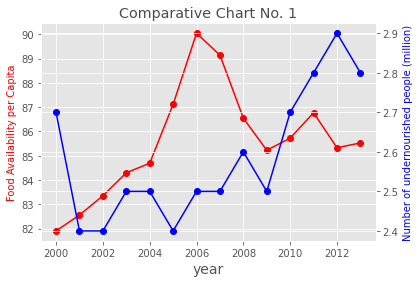

In [27]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(compare['Food Availability per capita'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Food Availability per Capita",color="red",fontsize=10)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(compare['Number of people undernourished (million) (3-year average)'],color="blue",marker="o")
ax2.set_ylabel("Number of undernourished people (millions)",color="blue",fontsize=10)
ax.set_title('Comparative Chart No. 1', alpha = 0.7)
plt.show()

No significant correlation. Although another interesting conclusion can be made from the fact that these two features do not correlation, there is still more interesting analysis that we can do. So we'll try again, this time comparing GDP per capita and the food availability per capita.

In [28]:
# New Dataframe, this time to compare GDP per capita and Food Availability per capita
data = [dp['Gross domestic product per capita, PPP, dissemination (constant 2011 international $)'],gua['Food Availability per capita']]
compart = pd.DataFrame(data)
compart = compart.T.dropna()

In [29]:
# Check the new dataframe
compart

,"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",Food Availability per capita
2000,6499,81.9028
2001,6492.7,82.5567
2002,6590.6,83.3473
2003,6611.6,84.2969
2004,6676.6,84.6882
2005,6752.5,87.1108
2006,6973,90.0408
2007,7267.6,89.1397
2008,7362.7,86.5441
2009,7263.6,85.224


In [30]:
# Same data cleaning and transformation process for new dataframe
compart['Gross domestic product per capita, PPP, dissemination (constant 2011 international $)'] = compart['Gross domestic product per capita, PPP, dissemination (constant 2011 international $)'].astype(float)
compart['Food Availability per capita'] = compart['Food Availability per capita'].astype(float)
compart['GDP bins'] = pd.cut(compart['Gross domestic product per capita, PPP, dissemination (constant 2011 international $)'], 7, labels=['6.4', '6.6', '6.8', '7.0', '7.2', '7.4', '7.6'])
compart['Availability bins'] = pd.cut(compart['Food Availability per capita'], 6, labels=['80','82', '84', '86', '88', '90'])

In [31]:
# See how the dataframe looks
compart

,"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",Food Availability per capita,GDP bins,Availability bins
2000,6499.0,81.902792,6.4,80
2001,6492.7,82.556718,6.4,80
2002,6590.6,83.347302,6.4,82
2003,6611.6,84.296858,6.4,82
2004,6676.6,84.688206,6.6,84
2005,6752.5,87.110761,6.6,86
2006,6973.0,90.040826,6.8,90
2007,7267.6,89.139683,7.2,90
2008,7362.7,86.544108,7.2,86
2009,7263.6,85.223976,7.2,84


Chi^2 test again. What matters is stating the null hypothesis, the alternative hypothesis and the confidence value.

Null Hypothesis: There is no relationship between the food availability per capita and the GDP per capita

Alternative Hypothesis: There is a relationship between the food availability per capita and the GDP per capita.

Confidence Value: We'll have a confidence value of 85%. In other words, if the P-value is anything below 0.15, we'll reject the null hypothesis.

In [32]:
# Chi^2 test, print the p-value
g, p, dof, expctd = chi2_contingency(pd.crosstab(compart['GDP bins'],compart['Availability bins']))

print(p)

0.14342520611782847


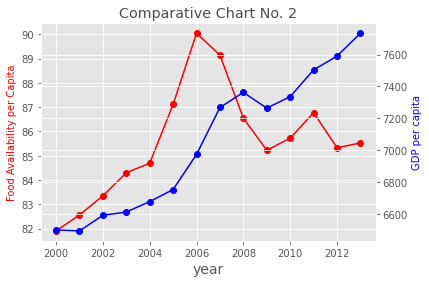

In [33]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(compart['Food Availability per capita'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Food Availability per Capita",color="red",fontsize=10)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(compart['Gross domestic product per capita, PPP, dissemination (constant 2011 international $)'],color="blue",marker="o")
ax2.set_ylabel("GDP per capita",color="blue",fontsize=10)
ax.set_title('Comparative Chart No. 2', alpha = 0.7)
plt.show()

There seems to be a larger correlation here... but what does that mean? Well, both the GDP per capita and the food availability per capita are theoretical values. In other words, they are different values that are calculated by grabbing a original feature and dividing it to the population of the country at that time. This calculation, however, does not cover the distribution of the attributes. 

That is to say, even if there was more or less food available at the time, and even if there was more or less money at the time, this doesn't mean that certain groups of people were able to enjoy the benefits of this. The high class could be earning more money, therefor increasing the GDP per capita, but this doesn't mean that the lower class earned more money. In other words, they still do not have the resources to sustain themselves correctly, and end up being undernourished.

To confirm our suspicions, we'll graph the GDP per capita versus the number of people undernourished.


In [43]:
# Create new comparative dataframe
data = [dp['Gross domestic product per capita, PPP, dissemination (constant 2011 international $)'],dp['Number of people undernourished (million) (3-year average)']]
fc = pd.DataFrame(data)
fc = fc.T.dropna()

In [44]:
# See how it looks
fc

,"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",Number of people undernourished (million) (3-year average)
Start Date,,
2000,6499,2.7
2001,6492.7,2.4
2002,6590.6,2.4
2003,6611.6,2.5
2004,6676.6,2.5
2005,6752.5,2.4
2006,6973,2.5
2007,7267.6,2.5
2008,7362.7,2.6


In [45]:
# Clean up data
fc['Number of people undernourished (million) (3-year average)'] = fc['Number of people undernourished (million) (3-year average)'] .astype(float)
fc['Gross domestic product per capita, PPP, dissemination (constant 2011 international $)'] = fc['Gross domestic product per capita, PPP, dissemination (constant 2011 international $)'].astype(float)

In [51]:
# Use the correlation coefficient to see if there's a linear correlation between the two variables.
fc.corr()


,"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",Number of people undernourished (million) (3-year average)
"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",1.000000,0.727586
Number of people undernourished (million) (3-year average),0.727586,1.000000


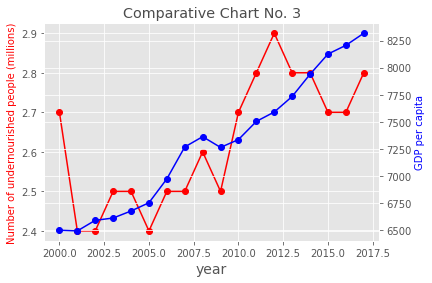

In [48]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(fc['Number of people undernourished (million) (3-year average)'] , color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Number of undernourished people (millions)",color="red",fontsize=10)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(fc['Gross domestic product per capita, PPP, dissemination (constant 2011 international $)'],color="blue",marker="o")
ax2.set_ylabel("GDP per capita",color="blue",fontsize=10)
ax.set_title('Comparative Chart No. 3', alpha = 0.7)
plt.show()

Contrary to what we had suspected, there's a strong relationship between GDP per capita and the number of undernourished people. Using the correlation coefficient graph, we were able to see that it had a value of 0.7 positive linear correlation. 

This might possibly be due to a lot of noice inside the data, as this would lead to believe that the more GDP per capita there is the more number of undernourished people there will be. Instead, this is a coincidental result, instead of a correlated one. Although the Guatemalan economy has continually improved and resulted in more GDP, increasing the value of GDP per capita, the increasing population and a lack of a solution for the division of classes results in a somewhat-increasing population of undernourished citizens.